<a href="https://colab.research.google.com/github/zolo012/Machine_learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

Creator: Bereczki Zoltán

In [ ]:
b # Load libraries

import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import io

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Load the provided .npy files. You can load it with numpy.
- each file contains one vector, X and y
- visualize X vs y on a scatter plot
- fit an y=w_0 + w_1⋅X + w_2⋅X^2 linear regression using sklearn

In [ ]:
# Open the files

from google.colab import files

file_name_list = ['X', 'y']

uploaded = [files.upload() for name in file_name_list]

print(uploaded)

Saving X.npy to X.npy


Saving y.npy to y.npy
[{'X.npy': b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \'fortran_order\': False, \'shape\': (1000,), }                                                         \n\x00 \x16\xc1\x8b\x179\xc0\xe4~\xa5\xa3$\x89V@\xdc\x02?\x7f\x0b3G@L\xd7\xeb{P\xbb3@\xe8\xaav\x1e\xf62Q\xc0F\n\xe0\'E3Q\xc0\xa83\xa1\x9e\x87\x18V\xc0\n\xef\x95\xfe\rOR@\xf8X\x92\xae\x1694@\xd8\xd7"r\xa8\xceD@\xd3\xbd\xa5\xba\x84\xf8W\xc0\xb22\x83\x9a\xd8~W@0\xaf\x9d\x0bD\x9fP@\t\x82}g\x1e\xc4L\xc0L\xec\x18\xe5G\xd1O\xc0(\x0fH4\xd8\xa8O\xc0\xbe\xb5Z\tf\x93C\xc0\xb0\xe5\xb4\x00\x1e\xce\x13@\x10\xcd\xd8\x80\xd48+\xc0\x9a\xb8\xf0\xb4\x88\xe0D\xc04\x1c\xffB\xde^6@\xc0Uu\x84z\x06R\xc0}\xfb\xd3\xd4\x18\xc9D\xc0pC.\x0cF\xba:\xc0\xe0<x\x01o\x92!\xc0\xd0\xd5:.\x81\x84L@%\x1f\xb8\xe6Y\x08N\xc0\xc0k\xa5\x0cm\xc6\x06@PH\xab<\xa0{2@j\x18\xa0Io\xadV\xc0\xe0\xf7\x01\xe2K\x825@\x823/\x8dJyP\xc0\xad\xc6\xaa\xf0V\xbfU\xc0\xd6\x85\xe3 \xbcqV@\xdaB\xc5\x0b\x17HW@0UQ\xdc\xf8\xd6N@r\xe8\xcc3\xe3\x89C\xc0\xe4\x91N\x04\xcc\x1dT\xc

In [ ]:
# Load the X array

X_arr = np.load(io.BytesIO(uploaded[0]['X.npy']))
X_arr

array([-25.09197623,  90.14286128,  46.39878836,  19.73169684,
       -68.79627191, -68.80109593, -88.38327757,  73.23522915,
        20.22300235,  41.61451556, -95.88310114,  93.98197043,
        66.48852816, -57.53217786, -63.63500656, -63.31909803,
       -39.15155141,   4.95128633, -13.61099627, -41.75417196,
        22.37057894, -72.10122787, -41.57107029, -26.72763134,
        -8.78600316,  57.03519228, -60.06524357,   2.84688768,
        18.48291377, -90.70991746,  21.50897038, -65.89517526,
       -86.9896814 ,  89.77710745,  93.12640661,  61.67946962,
       -39.07724617, -80.4655772 ,  36.8466053 , -11.96950125,
       -75.59235303,  -0.96461798, -93.12229578,  81.86408042,
       -48.24400368,  32.50445687, -37.65778478,   4.01360424,
         9.34205587, -63.02910889,  93.91692555,  55.02656467,
        87.89978831,  78.96547009,  19.57999576,  84.374847  ,
       -82.30149959, -60.80342752, -90.95454222, -34.93393385,
       -22.26454206, -45.73019365,  65.74750183, -28.64

In [ ]:
# Load the y array

y_arr = np.load(io.BytesIO(uploaded[1]['y.npy']))
y_arr

array([ 8.34547809e+01,  5.79128860e+02,  8.78315233e+01,  3.45591366e+01,
        2.85624528e+02,  2.76247269e+02,  4.41834104e+02,  3.62561750e+02,
        3.50762088e+00,  6.24045521e+01,  4.35897937e+02,  7.45891118e+02,
        2.42270866e+02,  1.16725766e+02,  1.80355938e+02,  2.25049039e+02,
        1.47682993e+00, -3.90286487e+01, -3.98836553e+01, -2.04372689e+01,
       -8.48955241e+01,  8.60346361e+01, -4.43631300e+01, -3.22176326e+01,
       -1.18309093e+02,  3.19719697e+02,  6.06050127e+00, -1.58885825e+02,
        9.34953514e+01,  2.83611531e+02, -7.83449357e+01,  3.46983277e+01,
        3.57795510e+02,  5.75061247e+02,  6.35221494e+02,  2.79271072e+02,
        5.14091415e+00,  2.76624135e+02,  1.10619984e+02,  1.84175972e+01,
        3.61260507e+02, -2.73378612e+01,  4.26697983e+02,  6.07147749e+02,
        3.00688035e+01,  7.11529710e+01,  1.21756290e+02, -7.58938213e+01,
       -1.54577159e+02,  2.51232914e+02,  7.41107101e+02,  2.15161971e+02,
        6.81635106e+02,  

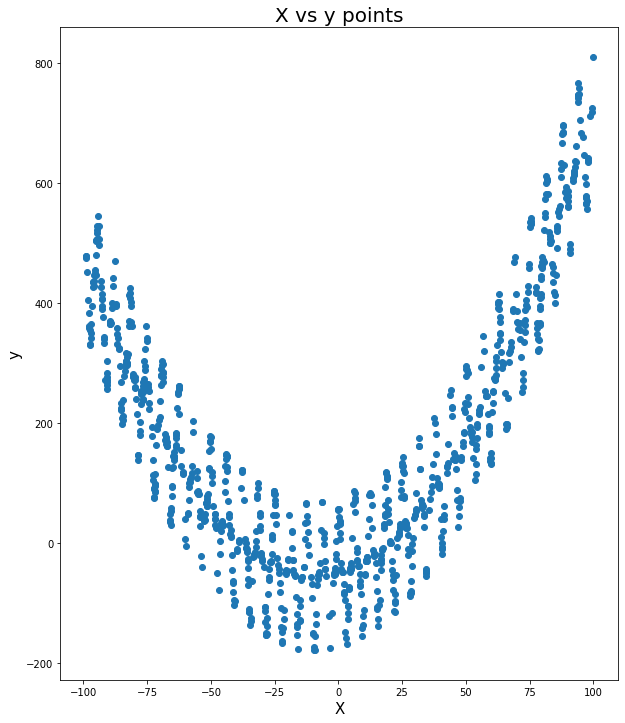

In [ ]:
# Visualize X vs y on a scatter plot

plt.figure(figsize=(10, 12))
plt.title('X vs y points', fontsize=20)
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(X_arr, y_arr)

In [ ]:
# fit an y=w_0 + w_1⋅X + w_2⋅X^2 linear regression using sklearn

# Create a matrix from X array

features = np.array(list(zip(X_arr, X_arr**2)))
features



array([[ -25.09197623,  629.60727115],
       [  90.14286128, 8125.7354401 ],
       [  46.39878836, 2152.84756149],
       ...,
       [ -72.63627382, 5276.0282739 ],
       [  90.04747076, 8108.54699102],
       [ -10.79884541,  116.61506215]])

In [ ]:
# Load linear regression model of sklearn
linear_model = LinearRegression()

# Fit the model to data
linear_model.fit(features, y_arr)

# Interception and coefficients
interc = linear_model.intercept_
coeff_list = linear_model.coef_

print('Interception:', interc)
print('Coefficients:', coeff_list)

Interception: -47.37293563362073
Coefficients: [1.18887634 0.06469683]


# 2. Using different features

- plot the residuals (the difference between the prediction and the actual y ) vs the original y
- a non-random-noise like pattern suggests non-linear connection between the features and the predictions
- someone told us that the connection between X and y is y=A⋅X+B⋅cos^3(X)+C⋅X^2+D
  - using sklearn's linear regression estimate A,B,C,D !
- plot the residuals again! is it better now?


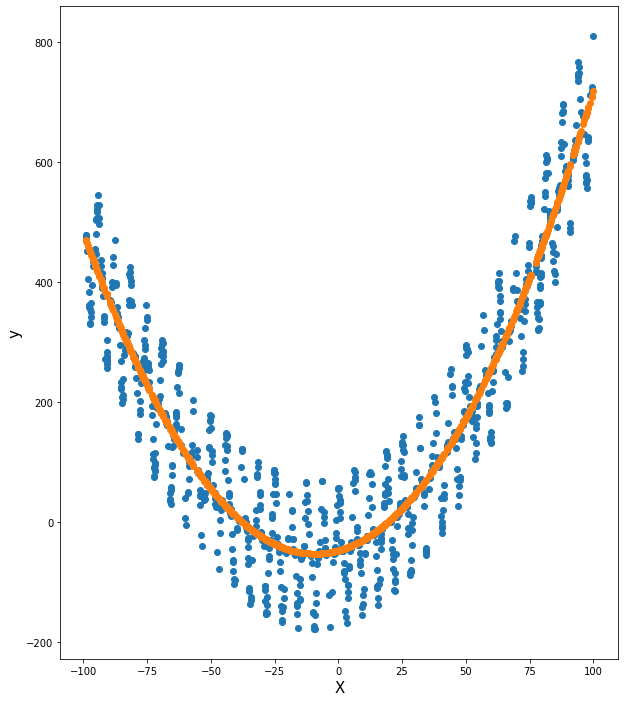

In [ ]:
# plot the residuals (the difference between the prediction and the actual y ) vs the original y 


# Plot data
plt.figure(figsize=(10, 12))
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(X_arr, y_arr)


# 1. method
y_pred = interc + coeff_list[0]*X_arr + coeff_list[1]*X_arr**2

# 2. method (sklearn)
# y_pred = linear_model.predict(features)

# Plot polynomial linear regression model
plt.scatter(X_arr, y_pred)

In [ ]:
# connection between X and y is y=A⋅X+B⋅cos^3(X)+C⋅X^2+D


features_new = np.array(list(zip(X_arr, np.cos(X_arr)**3, X_arr**2)))
features_new

array([[-2.50919762e+01,  9.97509738e-01,  6.29607271e+02],
       [ 9.01428613e+01, -1.85966482e-01,  8.12573544e+03],
       [ 4.63987884e+01, -4.19234778e-01,  2.15284756e+03],
       ...,
       [-7.26362738e+01, -8.01239806e-01,  5.27602827e+03],
       [ 9.00474708e+01, -1.17642962e-01,  8.10854699e+03],
       [-1.07988454e+01, -7.46774358e-03,  1.16615062e+02]])

In [ ]:
linear_model.fit(features_new, y_arr)

# Print interception and coefficients
print('Interception:', linear_model.intercept_)
print('Coefficients:', linear_model.coef_)

Interception: -50.07109269261795
Coefficients: [1.19676853e+00 1.23567661e+02 6.56986322e-02]


'A' variable is **1.197**

'B' variable is **123.6**

'C' variable is **0.00657**

'D' variable is **-50.071**

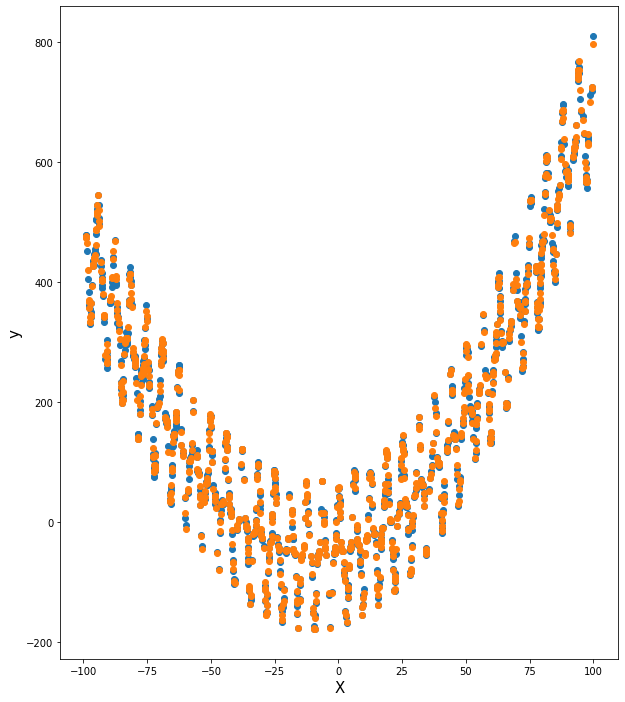

In [ ]:
# Plot residuals

# Plot data
plt.figure(figsize=(10, 12))
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(X_arr, y_arr)

# Plot y_pred
plt.scatter(X_arr, linear_model.predict(features_new))

It's significantly better. 

# 3. Other methdods than sklearn for linear regression

- using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
- is the result the same? if not guess, why? (did you not forget to add the constant term?)
- try to get the same results with statsmodels as with sklearn!
- using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?


In [ ]:
# using the statsmodels package perform the same linear regression as in 2. task

stat_ols = sm.OLS(y_arr, features_new).fit()

# Print interception and coefficients
print(stat_ols.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          2.217e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):                        0.00
Time:                        19:10:35   Log-Likelihood:                         -4927.8
No. Observations:                1000   AIC:                                      9862.
Df Residuals:                     997   BIC:                                      9876.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

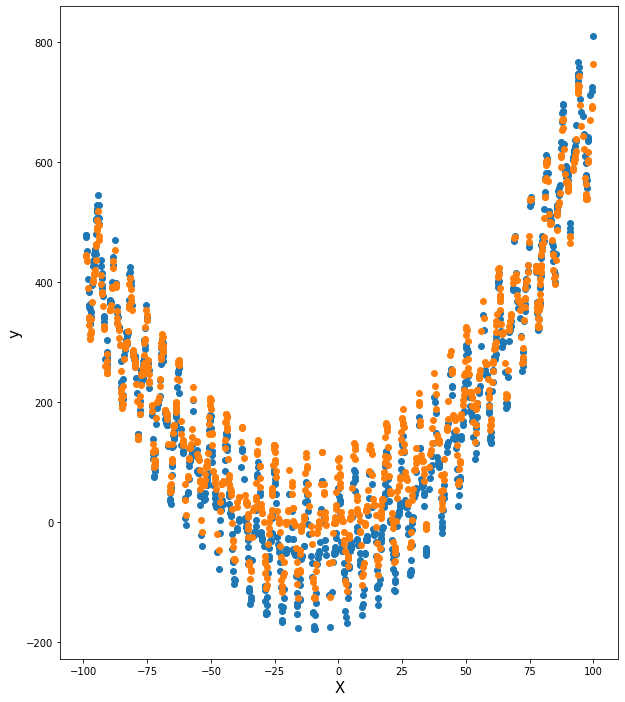

In [ ]:
# Plot residuals

plt.figure(figsize=(10, 12))
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)

plt.scatter(X_arr, y_arr)

plt.scatter(X_arr, stat_ols.predict(features_new))

The cause of the difference is that the constant isn't automatically added into the model in statsmodel package. 

In [ ]:
# Add costants
features_new_cons = sm.add_constant(features_new)
features_new_cons

array([[ 1.00000000e+00, -2.50919762e+01,  9.97509738e-01,
         6.29607271e+02],
       [ 1.00000000e+00,  9.01428613e+01, -1.85966482e-01,
         8.12573544e+03],
       [ 1.00000000e+00,  4.63987884e+01, -4.19234778e-01,
         2.15284756e+03],
       ...,
       [ 1.00000000e+00, -7.26362738e+01, -8.01239806e-01,
         5.27602827e+03],
       [ 1.00000000e+00,  9.00474708e+01, -1.17642962e-01,
         8.10854699e+03],
       [ 1.00000000e+00, -1.07988454e+01, -7.46774358e-03,
         1.16615062e+02]])

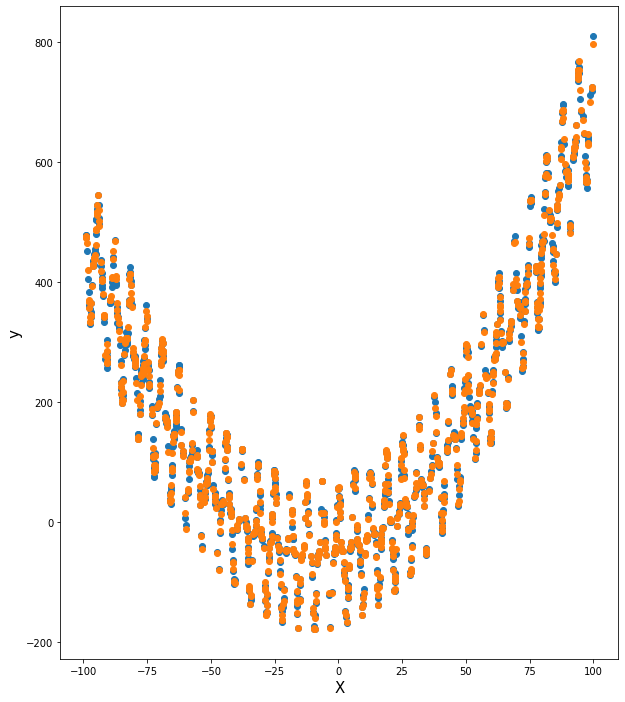

In [ ]:
# Plot residuals

stat_ols = sm.OLS(y_arr, features_new_cons).fit()

plt.figure(figsize=(10, 12))
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)

plt.scatter(X_arr, y_arr)

plt.scatter(X_arr, stat_ols.predict(features_new_cons))

# 4. Task

- load the real_estate data to a pandas dataframe drop the ID column and the geographic location columns fit a linear regression model to predict the unit price using sklearn


In [ ]:
# load real_estate data

uploaded = files.upload()

real_estate_df = pd.read_csv(io.BytesIO(uploaded['real_estate.csv']), sep=',')

Saving real_estate.csv to real_estate.csv


In [ ]:
real_estate_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
real_estate_df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
# drop the ID column and the geographic location columns

real_estate_df.drop(columns=['X5 latitude', 'X6 longitude', 'No'], inplace=True)
real_estate_df.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [ ]:
# fit a linear regression model to predict the unit price using sklearn

linear_model.fit(real_estate_df.iloc[:, :-1], real_estate_df.iloc[:, -1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 5. Task
- interpret the coefficients and their meaning shortly with your own words
- plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?

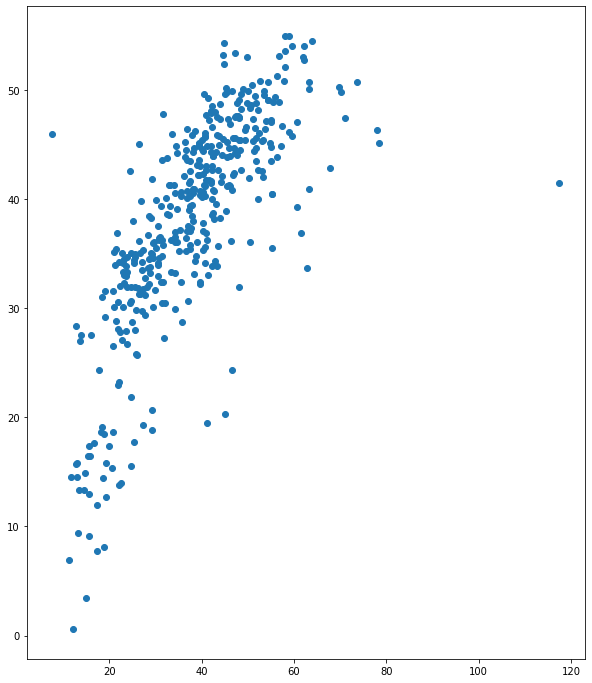

In [ ]:
# Plot residuals
plt.figure(figsize=(10, 12))

plt.scatter(real_estate_df.iloc[:, -1], linear_model.predict(real_estate_df.iloc[:, :-1]))

In [ ]:
linear_model.intercept_

-11588.747800122881

In [ ]:
 real_estate_df.iloc[:, :-1].columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores'],
      dtype='object')

In [ ]:
# Coefficients of model
pd.DataFrame(linear_model.coef_, real_estate_df.iloc[:, :-1].columns, columns=['Coefficient'])

,Coefficient
X1 transaction date,5.778043
X2 house age,-0.254478
X3 distance to the nearest MRT station,-0.005513
X4 number of convenience stores,1.257864


The first coefficient indicates that for every additional day of transaction date I can expect price to increase by 5.778 dollars.

The second coefficient indicates that for every additional age of house I can expect price to decrease by 0.2545 dollars.

The third coefficient indicates that for every additional meter in distance to the nearest MRT station I can expect price to decrease by 0.005513 dollars.

The fourth coefficient indicates that for every additional convenience store I can expect price to increase 1.258 dollars.